# Классификация. Дерево решений.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


![Types of machine learning](https://i.vas3k.ru/7r6.jpg)
[Коротко о машинном обучении](https://vas3k.ru/blog/machine_learning/)

## Дерево решений

In [5]:
df[['Age','EstimatedSalary','Gender','Exited']].head(10)

,Age,EstimatedSalary,Gender,Exited
0,42,101348.88,Female,1
1,41,112542.58,Female,0
2,42,113931.57,Female,1
3,39,93826.63,Female,0
4,43,79084.10,Female,0
5,44,149756.71,Male,1
6,50,10062.80,Male,0
7,29,119346.88,Female,1
8,44,74940.50,Male,0
9,27,71725.73,Male,0


In [6]:
df.shape

(10000, 14)

In [7]:
train = df[:7000]
test = df[:3000]

In [8]:
X_train = train.drop('Exited', axis=1)
X_test = test.drop('Exited', axis=1)

print(X_train.shape, X_test.shape)

(7000, 13) (3000, 13)


In [9]:
y_train = train['Exited']
y_test = test['Exited']

print(y_train.shape, y_test.shape)

(7000,) (3000,)


![Классическое дерево решений](https://habrastorage.org/getpro/habr/upload_files/476/3a4/023/4763a4023eecc0c33289aa195cf6e147)

### Энтропия Шеннона

$$S = -\sum_{i=1}^{N}p_ilog_2p_i,$$

In [10]:
import math

balls = [0,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1]
g_orange = balls.count(0)
g_blue = balls.count(1)
p_or = g_orange/len(balls)
p_blue = g_blue/len(balls)
g_ent = -(p_or * math.log(p_or) + p_blue * math.log(p_blue))

g_ent

0.6881388137135884

In [11]:
def get_entropy(x):
    return x * math.log(x)


g1_entr = []
g2_entr = []

for i in range(len(balls)):
    group1 = balls[:i]
    group2 = balls[i:]
    
    g1_or = group1.count(0)
    g2_or = group2.count(0)
    g1_bl = group1.count(1)
    g2_bl = group2.count(1)
    
    if g1_or>0:
        g1_p_or = g1_or/len(group1)
        g1_ent_or = get_entropy(g1_p_or)
    else:
        g1_ent_or = 0
    
    if g2_or>0:
        g2_p_or = g2_or/len(group2)
        g2_ent_or = get_entropy(g2_p_or)
    else:
        g2_ent_or = 0
    
    if g1_bl>0:
        g1_p_bl = g1_bl/len(group1)
        g1_ent_bl = get_entropy(g1_p_bl)
    else:
        g1_ent_bl = 0
    
    if g2_bl>0:
        g2_p_bl = g2_bl/len(group2)
        g2_ent_bl = get_entropy(g2_p_bl)
    else:
        g2_ent_bl = 0
        
    g1_ent = -(g1_ent_or + g1_ent_bl)
    g2_ent = -(g2_ent_or + g2_ent_bl)
    
    IG = len(group1)/len(balls) * g1_ent + len(group2)/len(balls) * g2_ent
    
    print ('Step %s, entropy for first group: %.2f,  entropy for second group: %.2f, IG: %.2f' % (i, g1_ent, g2_ent, IG))
        
    

Step 0, entropy for first group: 0.00,  entropy for second group: 0.69, IG: 0.69
Step 1, entropy for first group: -0.00,  entropy for second group: 0.69, IG: 0.66
Step 2, entropy for first group: 0.69,  entropy for second group: 0.69, IG: 0.69
Step 3, entropy for first group: 0.64,  entropy for second group: 0.68, IG: 0.67
Step 4, entropy for first group: 0.56,  entropy for second group: 0.66, IG: 0.64
Step 5, entropy for first group: 0.50,  entropy for second group: 0.64, IG: 0.60
Step 6, entropy for first group: 0.64,  entropy for second group: 0.65, IG: 0.65
Step 7, entropy for first group: 0.68,  entropy for second group: 0.67, IG: 0.67
Step 8, entropy for first group: 0.69,  entropy for second group: 0.68, IG: 0.68
Step 9, entropy for first group: 0.69,  entropy for second group: 0.69, IG: 0.69
Step 10, entropy for first group: 0.69,  entropy for second group: 0.67, IG: 0.68
Step 11, entropy for first group: 0.69,  entropy for second group: 0.64, IG: 0.67
Step 12, entropy for firs

Неопределенность Джини (Gini impurity):  $G = 1 - \sum\limits_k (p_k)^2$

![img](https://habrastorage.org/r/w1560/storage2/785/21c/7c6/78521c7c61114d0c433d76cb4f282f15.png)


![Пример с шариками](https://habrastorage.org/r/w1560/storage2/173/96f/27f/17396f27f81e9bb312f2f01aa1254dbe.png)

[Подробнее](https://habr.com/ru/post/171759/)

![](https://www.researchgate.net/publication/340567535/figure/fig2/AS:880966289588226@1587050139118/Train-test-cross-validation-split-methodology-used-in-this-paper-The-first-operation.jpg)

![](https://i.stack.imgur.com/XJZve.png)

![](https://miro.medium.com/max/1200/1*GH7h526OcmtDy3Q1jeOjHw.png)

Плюсы:
* Высокая скорость
* Интерпретация
* Устойчив к выбросам

## K-means (метрическая)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Iris_Flowers_Clustering_kMeans_ru.svg/1920px-Iris_Flowers_Clustering_kMeans_ru.svg.png)

In [12]:
from sklearn.datasets import load_iris
iris=load_iris()

<Figure size 432x288 with 0 Axes>

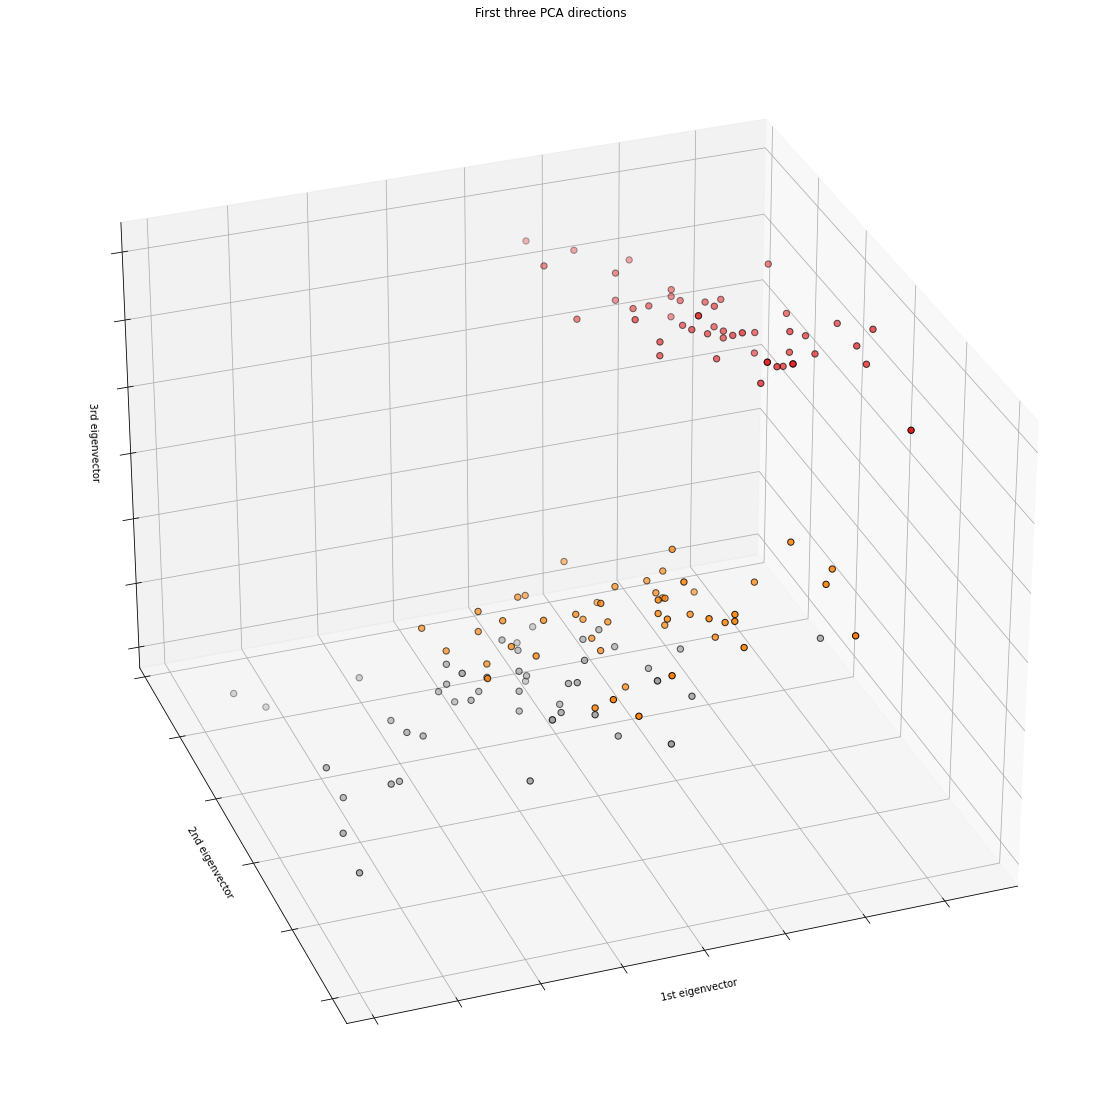

In [13]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.clf()

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [15]:
df.loc[df['Tenure'].isna(),'Tenure'] = df['Tenure'].median()

In [16]:
df['Gender']=df['Gender'].map({'Female':0, 'Male':1})

In [17]:
df_dummies = pd.get_dummies(df['Geography'])
df_dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [18]:
df.drop(columns=['RowNumber','CustomerId','Surname','Geography'], inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2.0,0.00,1,1,1,101348.88,1
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0,39,1.0,0.00,2,0,0,93826.63,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0


In [19]:
df = pd.concat([df, df_dummies],axis=1)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2.0,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1.0,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5.0,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7.0,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3.0,75075.31,2,1,0,92888.52,1,0,1,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7000, 12) (7000,) (3000, 12) (3000,)


In [23]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
5663,850,0,38,2.0,0.00,2,1,0,9015.07,1,0,0
2840,528,1,40,4.0,0.00,2,1,0,25399.70,0,0,1
4550,579,0,39,3.0,166501.17,2,1,0,93835.64,1,0,0
17,549,0,24,9.0,0.00,2,1,1,14406.41,0,0,1
3442,850,0,30,8.0,154870.28,1,1,1,54191.38,0,1,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

first_tree = DecisionTreeClassifier(random_state=10)

In [25]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.7889999999999999

In [26]:
from sklearn.neighbors import KNeighborsClassifier
first_knn = KNeighborsClassifier()

In [27]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.7624285714285715

In [28]:
from sklearn.model_selection import GridSearchCV
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10), 
    'max_features': [0.5, 0.7, 1],
    'min_samples_leaf': [3, 5, 6]
}
tree_grid = GridSearchCV(first_tree,tree_params,cv=5, n_jobs=-1)

In [29]:
%%time
tree_grid.fit(X_train,y_train)

CPU times: user 336 ms, sys: 97.8 ms, total: 433 ms
Wall time: 3.27 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': [0.5, 0.7, 1],
                         'min_samples_leaf': [3, 5, 6]})

In [30]:
tree_grid.best_score_, tree_grid.best_params_

(0.857,
 {'criterion': 'entropy',
  'max_depth': 6,
  'max_features': 0.7,
  'min_samples_leaf': 3})

In [31]:
first_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [32]:
%%time
knn_params = {'n_neighbors': range(5,30,5)}
knn_grid = GridSearchCV(first_knn,knn_params,cv=5, n_jobs=-1)
knn_grid.fit(X_train,y_train)

CPU times: user 40 ms, sys: 6.79 ms, total: 46.8 ms
Wall time: 323 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 30, 5)})

In [33]:
knn_grid.best_score_, knn_grid.best_params_

(0.7968571428571428, {'n_neighbors': 20})

In [34]:
y_preds = tree_grid.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.845

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix?

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

In [37]:
confusion_matrix(y_test,y_preds)

array([[2312,   68],
       [ 397,  223]])

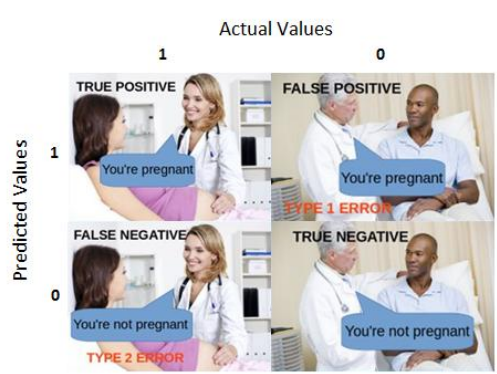

In [38]:
second_tree = DecisionTreeClassifier(max_depth=7, max_features=0.7, random_state=10, criterion='entropy')
second_tree.fit(X_train, y_train)
second_tree.score(X_test, y_test)

0.855

In [39]:
from sklearn.tree import export_graphviz
export_graphviz(second_tree, out_file="tree.dot", feature_names=X.columns, filled=True)

🛠 Построить дерево решений, подобрать эффективные гиперпараметры для измерения accuracy_score и отобразить матрицу 
ошибок для датасета выживших на Титанике.

In [40]:
df = pd.read_csv('../data/titanic.csv')
y=df['survived']
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
